In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations
from utils import dataframeUtil
from utils import plotUtils
from utils import statisticsUtils
from utils import modelUtils
from sklearn import preprocessing
from random import randrange

In [11]:
x, y, test_x, test_y = modelUtils.getTrainAndTestData()

5000
5000


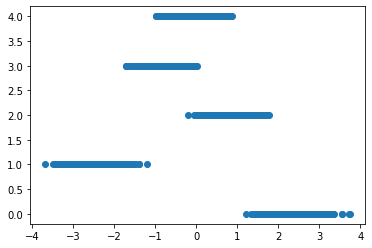

In [12]:
#scaler = preprocessing.MinMaxScaler()
y_transformed = y * [0,1,2,3,4]
y_d1 = np.max(y_transformed, axis=1)

x_d1=[]
for chart in x:
    means = np.mean(chart)
    x_d1.append(means)

print(len(y_d1))
print(len(x_d1))
#y_normlized = scaler.fit_transform([y_d1])
y_normlized = preprocessing.normalize([y_d1])
x_normlized = preprocessing.normalize([x_d1])
y_normlized = [y_d1]
x_normlized = [x_d1]
plt.scatter(x_normlized, y_normlized)

In [13]:
#slopes = statisticsUtils.getRegSlopesForAllPattern("../")
x_d1=[]
for chart in x:
    slope =statisticsUtils.getSlope(chart)
    x_d1.append(slope)
x_normlized = [x_d1]

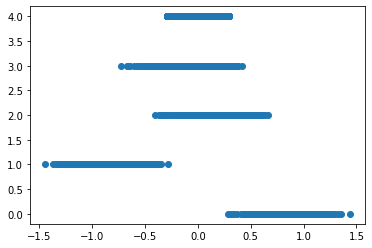

In [14]:
plt.scatter(x_normlized, y_normlized)


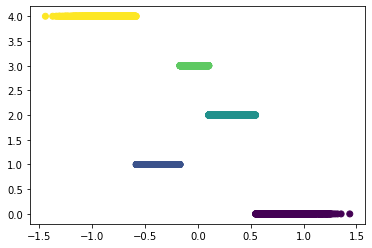

[[ 0.85852498]
 [-0.31348681]
 [ 0.23193709]
 [-0.02710362]
 [-0.85610062]]


In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(np.asarray(x_normlized[0]).reshape(-1,1) )
plt.scatter(x_normlized,  pred_y,c=kmeans.labels_.astype(float))
#plt.scatter( y_normlized,c='red')
#plt.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_, s=300, c='red')
plt.show()
print(kmeans.cluster_centers_)

In [16]:
def transform_one_y(y):
    predictions = []
    if y ==0:
     predictions.append([1,0,0,0,0])
    if y ==1:
     predictions.append([0,1,0,0,0])
    if y ==2:
     predictions.append([0,0,1,0,0])
    if y ==3:
     predictions.append([0,0,0,1,0])
    if y ==4:
     predictions.append([0,0,0,0,1])
    return np.asanyarray(predictions[0])

def transform_y(y):
    predictions = []
    for one_y in y:
        result= transform_one_y(one_y)
        predictions.append(result)
    return np.asanyarray(predictions)

In [17]:

y_pred = kmeans.predict(np.asarray(x_normlized[0]).reshape(-1,1))
predictions=transform_y(y_pred)
#print(y_pred)
# predictions = predict(pred)
# print(predictions)
# label=modelUtils.getDetectionLabel_for_5y(predictions)
# print(label)
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,y)
print(report)

0.4042
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1000
           1       0.12      0.09      0.10      1000
           2       0.55      0.56      0.56      1000
           3       0.31      0.43      0.36      1000
           4       0.00      0.00      0.00      1000

    accuracy                           0.40      5000
   macro avg       0.39      0.40      0.40      5000
weighted avg       0.39      0.40      0.40      5000



-0.631572499074982


(-0.631572499074982, -0.4872269394474804)

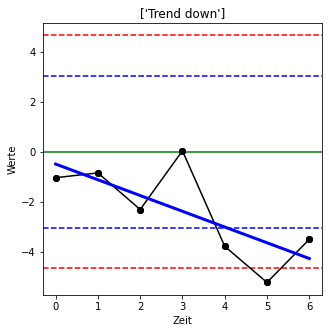

In [18]:
chart,target,label = modelUtils. getRandomChart(x,y,True)
slope =statisticsUtils.getSlope(chart[0])
print(slope)
plotUtils.plotSlope(chart[0])

In [19]:
h = [4,3,2]
print(h[-1])

2
